In [377]:
%reset
%matplotlib inline


import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import matplotlib.pyplot as plt 

from nilearn import plotting 

from scipy import spatial

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [378]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'
out_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'

cor_mat = np.load(top_dir + 'LearningBrain_matrices_all_lp_0.08_aCompCor_power.npy')

cor_mat[16, 1, 0, :, :] = 0 # zeroing missing data
cor_mat[34, 1, 0, :, :] = 0

cor_mat.shape

(46, 4, 3, 264, 264)

In [379]:
# Selecting subjects which finished the study

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/github/LearningBrain_networks/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]['sub']
subs = pd.Series.tolist(trained_subs)
subs[:5]


['sub-01', 'sub-02', 'sub-04', 'sub-05', 'sub-06']

In [380]:
# Selecting subjects to exclude

# dualnback

dualnback_exclude = ['sub-13', 'sub-21', 'sub-23', 'sub-50'] # higly motion subjects in one of four sessions
rest_exclude = ['sub-20', 'sub-44', 'sub-21', 'sub-46', 'sub-47'] # higly motion subjects in one of four sessions / missing data(20-44)

dual_vector = []
rest_vector = []
first_vector = np.array(subs) ==  'sub-21' # subject with highly motion on first session

for sub in subs:
    if sub in dualnback_exclude:
        dual_vector.append(False)
    else:
        dual_vector.append(True)


for sub in subs:
    if sub in rest_exclude:
        rest_vector.append(False)
    else:
        rest_vector.append(True)

In [381]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:, None] < r
    return A[mask]

In [382]:
cor_mat = cor_mat[:,:,1:,:,:] # selecting dualnback conditions

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

M = np.zeros((subs * sess * cond, subs * sess * cond))
i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for subx in range(subs):
                for sesx in range(sess):
                    for conx in range(cond):
                        A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                        B = upper_tri_masking(cor_mat[subx, sesx, conx, :, :])
                        similarity = 1 - spatial.distance.cosine(A, B)
                        M[i,j] = similarity
                        j += 1
            i += 1
            j = 0

In [383]:
subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_mat[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


In [384]:
# Creating groups vectors

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/github/LearningBrain_networks/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]

experimental = (trained_subs == 'Experimental')
control = (trained_subs == 'Control')

exp_vector = experimental['group'].values * dual_vector
con_vector = control['group'].values * dual_vector

print(exp_vector)
print(con_vector)

[False False False  True  True  True False False  True False False  True
 False  True  True  True False False False  True False False  True False
  True False  True False False False  True False False False  True  True
 False  True  True False  True  True False  True False  True]
[ True  True  True False False False  True  True False  True False False
  True False False False  True False False False  True  True False  True
 False  True False  True  True  True False  True  True  True False False
  True False False False False False  True False  True False]


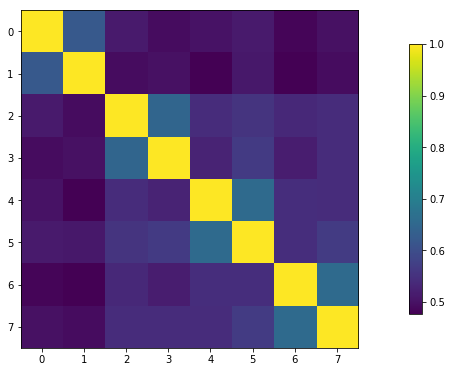

In [385]:
experimental = K[exp_vector,:,:]
control = K[con_vector,:,:]


exp = experimental.mean(axis = 0)
con = control.mean(axis = 0)

plotting.plot_matrix(exp, cmap="viridis")

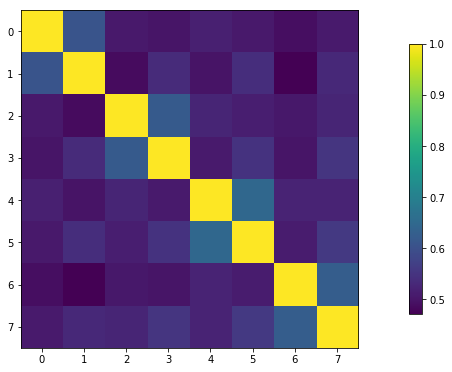

In [386]:
plotting.plot_matrix(con, cmap="viridis")

In [389]:
modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)

mod = modules[0].values

DMFP = (mod == 'DM')|(mod == 'FP')
DM = (mod == 'DM')
FP = (mod == 'FP')

DMFP

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [399]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))
cor_matx = cor_mat[:,:,:,:,FP]
cor_matx = cor_matx[:,:,:,FP,:]



In [400]:
K = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_matx[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_matx[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


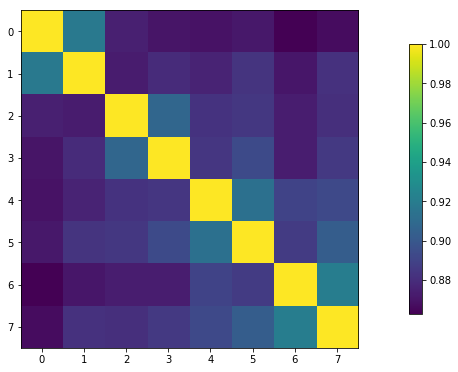

In [401]:
experimental = K[exp_vector,:,:]
control = K[con_vector,:,:]


exp = experimental.mean(axis = 0)
con = control.mean(axis = 0)

plotting.plot_matrix(exp, cmap="viridis")

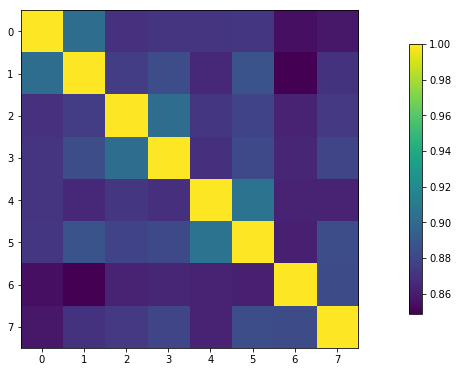

In [402]:
plotting.plot_matrix(con, cmap="viridis")